In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ast import literal_eval
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler



In [2]:
df1=pd.read_csv("yearly_trend.csv")
df2=pd.read_csv("Song_Analytics.csv")

In [3]:
df1= pd.merge(df1,df2,on="track_name")
df=df1.drop(columns="release_year")

In [4]:
df.head(1)

,track_name,year_distribution,tempo,mean_zcr,median_zcr,std_zcr,max_zcr,aboveThr_zcr,mean_sc,median_sc,...,contrast_del_mean,contrast_avg_sd,Tone1,Tone2,Tone3,Tone4,Tone5,Tone6,Tone_deltaMean,Tone_avg_sd
0,0800 HEAVEN,"{2014: 0.0, 2015: 0.021479713603818614, 2016: ...",143.554688,0.0918,0.0913,0.0527,0.6323,0.4358,2196.7699,2259.6592,...,0.6804,6.128429,0.1183,0.1248,0.1614,0.127,0.0527,0.0522,0.00906,0.106067


In [5]:
df["year_distribution"] = df["year_distribution"].apply(literal_eval)


In [6]:
df = pd.concat([df.drop(['year_distribution'], axis=1), df['year_distribution'].apply(pd.Series)], axis=1)

C:\Users\Sanjana\AppData\Local\Temp\ipykernel_26276\2200941597.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df = pd.concat([df.drop(['year_distribution'], axis=1), df['year_distribution'].apply(pd.Series)], axis=1)


In [7]:
df.head(1)

,track_name,tempo,mean_zcr,median_zcr,std_zcr,max_zcr,aboveThr_zcr,mean_sc,median_sc,std_sc,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,0800 HEAVEN,143.554688,0.0918,0.0913,0.0527,0.6323,0.4358,2196.7699,2259.6592,862.0266,...,0.0,0.02148,0.011933,0.0,0.009547,0.016706,0.011933,0.0,0.01432,0.914081


In [8]:
# Separate features (X) and target (y) for all target columns
X = df.drop([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,"track_name"], axis=1)
y = df[[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]]

In [22]:
X.columns

Index(['tempo', 'mean_zcr', 'median_zcr', 'std_zcr', 'max_zcr', 'aboveThr_zcr',
       'mean_sc', 'median_sc', 'std_sc', 'max_sc', 'aboveThr_sc', 'mean_sb',
       'median_sb', 'std_sb', 'max_sb', 'aboveThr_sb', 'mean_sr', 'median_sr',
       'std_sr', 'max_sr', 'aboveThr_sr', 'pitch1_intensity',
       'pitch2_intensity', 'pitch3_intensity', 'pitch4_intensity',
       'pitch5_intensity', 'pitch6_intensity', 'pitch7_intensity',
       'pitch8_intensity', 'pitch9_intensity', 'pitch10_intensity',
       'pitch11_intensity', 'pitch12_intensity', 'MFCC1', 'MFCC2', 'MFCC3',
       'MFCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8', 'MFCC9', 'MFCC10',
       'MFCC11', 'MFCC12', 'MFCC13', 'MFCC14', 'MFCC15', 'MFCC16', 'MFCC17',
       'MFCC18', 'MFCC19', 'MFCC20', 'MFCC_Variability', 'Band1', 'Band2',
       'Band3', 'Band4', 'Band5', 'Band6', 'contrast_del_mean',
       'contrast_avg_sd', 'Tone1', 'Tone2', 'Tone3', 'Tone4', 'Tone5', 'Tone6',
       'Tone_deltaMean', 'Tone_avg_sd'],
      dtype='obj

In [9]:



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the RandomForestRegressor (you can choose a different regression model)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')




Mean Squared Error: 0.025992875948067894


In [10]:
test= np.array(y_test.iloc[0])
test

array([0.02914573, 0.01708543, 0.0120603 , 0.00904523, 0.63115578,
       0.11859296, 0.05025126, 0.05427136, 0.05527638, 0.02311558])

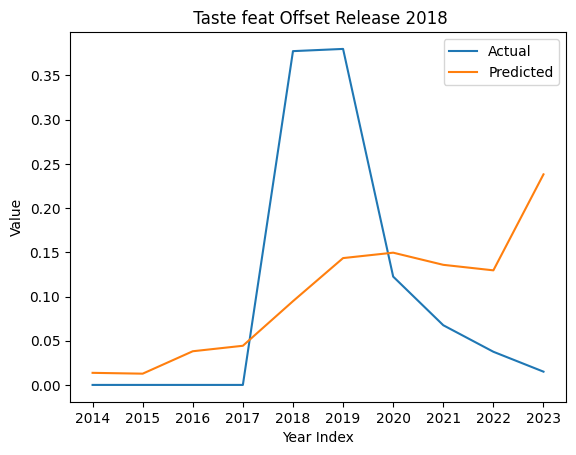

In [11]:
ind=2
df_ind=y_test.index[ind]
test= np.array(y_test.iloc[ind])
pred= y_pred[ind]

# Plot the actual values
plt.plot(test, label='Actual')

# Plot the predicted values
plt.plot(pred, label='Predicted')

# Customize the plot
plt.title(f" {df['track_name'].loc[df_ind]} Release {df1['release_year'].loc[df_ind]}")
years = np.arange(2014, 2024)
plt.xticks(range(len(years)), years)
plt.xlabel('Year Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [12]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

In [13]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR()

# MultiOutputRegressor for handling multiple target columns
multioutput_svr_model = MultiOutputRegressor(svr_model)

# Train the model
multioutput_svr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = multioutput_svr_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'MultiOutput SVR Mean Squared Error: {mse}')


MultiOutput SVR Mean Squared Error: 0.02908583650058046


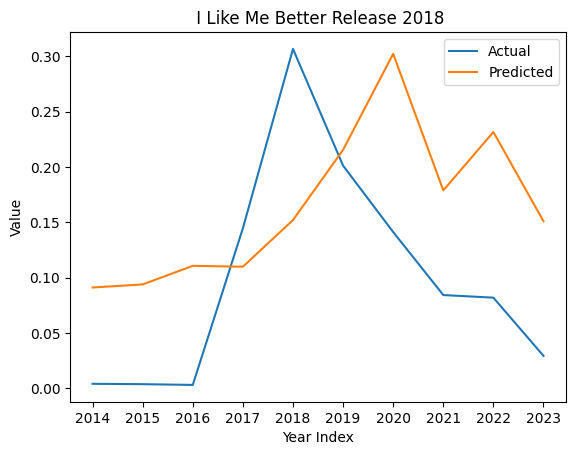

In [14]:
ind=19
df_ind=y_test.index[ind]
test= np.array(y_test.iloc[ind])
pred= y_pred[ind]

# Plot the actual values
plt.plot(test, label='Actual')

# Plot the predicted values
plt.plot(pred, label='Predicted')

# Customize the plot
plt.title(f" {df['track_name'].loc[df_ind]} Release {df1['release_year'].loc[df_ind]}")
years = np.arange(2014, 2024)
plt.xticks(range(len(years)), years)
plt.xlabel('Year Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [15]:

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()

# MultiOutputRegressor for handling multiple target columns
multioutput_gb_model = MultiOutputRegressor(gb_model)

# Train the model
multioutput_gb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = multioutput_gb_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'MultiOutput Gradient Boosting Mean Squared Error: {mse}')

MultiOutput Gradient Boosting Mean Squared Error: 0.03186987639684606


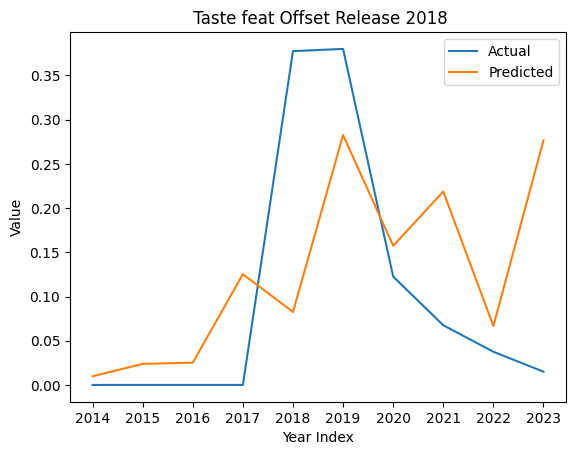

In [16]:
ind=2
df_ind=y_test.index[ind]
test= np.array(y_test.iloc[ind])
pred= y_pred[ind]

# Plot the actual values
plt.plot(test, label='Actual')

# Plot the predicted values
plt.plot(pred, label='Predicted')

# Customize the plot
plt.title(f" {df['track_name'].loc[df_ind]} Release {df1['release_year'].loc[df_ind]}")
years = np.arange(2014, 2024)
plt.xticks(range(len(years)), years)
plt.xlabel('Year Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr_model = LinearRegression()

# MultiOutputRegressor for handling multiple target columns
multioutput_lr_model = MultiOutputRegressor(lr_model)

# Train the model
multioutput_lr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = multioutput_lr_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'MultiOutput Linear Regression Mean Squared Error: {mse}')

MultiOutput Linear Regression Mean Squared Error: 0.028905702954183397


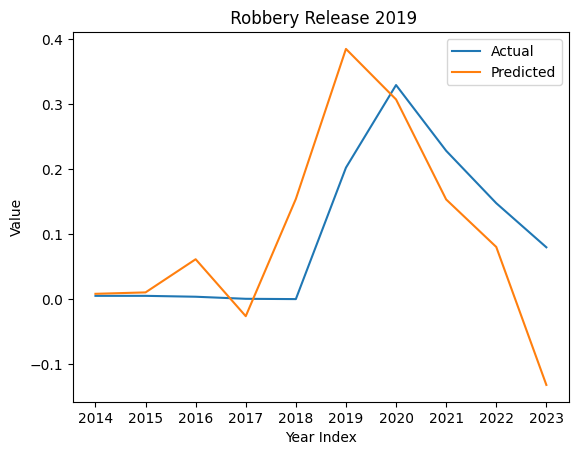

In [19]:
ind=10
df_ind=y_test.index[ind]
test= np.array(y_test.iloc[ind])
pred= y_pred[ind]

# Plot the actual values
plt.plot(test, label='Actual')

# Plot the predicted values
plt.plot(pred, label='Predicted')

# Customize the plot
plt.title(f" {df['track_name'].loc[df_ind]} Release {df1['release_year'].loc[df_ind]}")
years = np.arange(2014, 2024)
plt.xticks(range(len(years)), years)
plt.xlabel('Year Index')
plt.ylabel('Value')
plt.legend()
plt.show()